In [2]:
import numpy as np
import open3d as o3d
import pathlib
import re
from ipywidgets import interact
from lib.datasets.kitti_utils import Calibration
import cv2

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from pathlib import Path
from tools.sample_util import SampleDatabase
from tools.dataset_util import Dataset
test_dir = Path("/mnt/e/DataSet/kitti/kitti_img_database/test")
np.random.seed(0)

idx = 4

database = SampleDatabase("/mnt/e/DataSet/kitti/kitti_img_database/")
dataset = Dataset("train", r"/mnt/e/DataSet/kitti")

calib_ = dataset.get_calib(idx)
image, depth = dataset.get_image_with_depth(idx, use_penet=True)
ground, non_ground = dataset.get_lidar_with_ground(idx, fov=True)
plane_ = dataset.get_plane(idx)
samples = database.get_samples(ground, non_ground, calib_, plane_)
image_, depth_, flag = database.add_samples_to_scene(samples, image, depth)
    

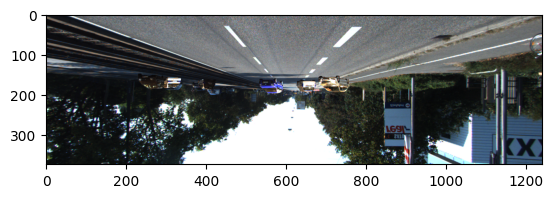

In [6]:
from tools.visualize_util import plt_show
image_flip = cv2.flip(image_, 0)
plt_show(image_flip)

In [10]:
from tools.visualize_util import show_o3d
from tools.sample_util import to3d
cord, rgb = to3d(image_, depth_, calib_)
show_o3d(cord, rgb, bbox3d=samples[0].bbox3d_)

In [3]:
bbox3d, _, labels = dataset.get_bbox(idx, chosen_cls=["Car"])
labels += [sample.to_label() for sample in samples]
labels = sorted(labels, key=lambda x:x.pos[2], reverse=True)
labels

NameError: name 'dataset' is not defined

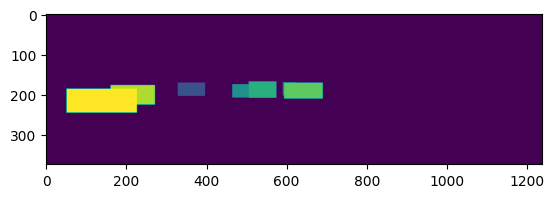

In [12]:
canvas = np.zeros(image.shape[:2], dtype=np.int8) - 1
for i, label in enumerate(labels):
    corners = label.generate_corners3d()
    uv, _ = calib_.rect_to_img(corners)
    u_min = round(max(0, np.min(uv[:, 0])))
    v_min = round(max(0, np.min(uv[:, 1])))
    u_max = round(min(np.max(uv[:, 0]), image.shape[1]))
    v_max = round(min(np.max(uv[:, 1]), image.shape[0]))
    
    canvas[v_min: v_max, u_min: u_max] = i
    label.area = (v_max - v_min) * (u_max - u_min)

from matplotlib import pyplot as plt
plt.imshow(canvas)
plt.show()

In [13]:
for i, label in enumerate(labels):
    area = np.sum(canvas == i)
    label.area = area / label.area
    print(label.area)

1.0
0.0
0.8841354723707665
0.5176470588235293
0.0
0.0
0.48538334252619963
0.0


In [2]:
import numpy as np
x_ = np.random.uniform(low=5, high=10, size=(10, 1))

In [3]:
x_

array([[9.56614287],
       [9.08169299],
       [8.03129191],
       [6.63419107],
       [5.08132767],
       [9.65307973],
       [5.94261438],
       [9.76341658],
       [7.93210955],
       [6.67197823]])